# Ejercicio Ensamble 
**Elaborado por: Mariana López González**

---

Lactiplantibacillus plantarum (firmicutes) Strain: 92117_i3 (ASM2846256v1)

File Fastq was downloaded in local folder and then uploaded to user folder in Apolo: /home/mlopezg11/slurm_ensamble

In [ ]:
%%bash
cp mlopezg11@apolo.eafit.edu.co:/home/mlopezg11/slurm_ensamble/L.plantarum_SRR23493799_fastqc.html ~/Desktop 


Creating Conda enviroment **dentro de la terminal de apolo**

In [ ]:
%%bash
#Loading python 
module load python/3.6.0_miniconda-4.3.11_gcc-11.2.0
#Creating environment 
conda create --name l.plantarum_ensamble
conda init bash
#Listing and Loading enviroment 
conda env list
conda activate l.plantarum_ensamble

In [ ]:
%%bash
#Installing software and packagets needed
#Fastqc
conda install -c bioconda fastqc
#Trimmomactic
conda install -c bioconda 
#ABySS
conda install -c bioconda abyss
#SPAdes
conda install -c bioconda spades

In [ ]:
%%bash
#Checking quality reads
fastqc L.plantarum_SRR23493799.fastq
#Downloading report (terminal en computador local)
scp mlopezg11@apolo.eafit.edu.co:/home/mlopezg11/slurm_ensamble/L.plantarum_SRR23493799_fastqc.html ~/Desktop

### Quality reads report

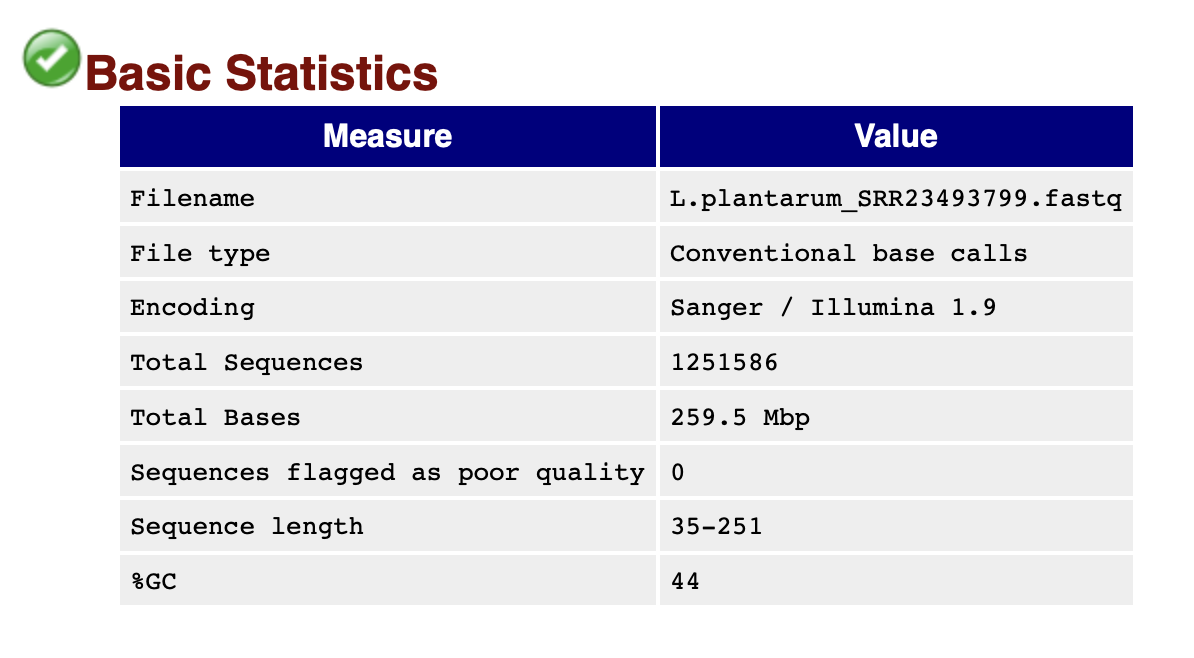

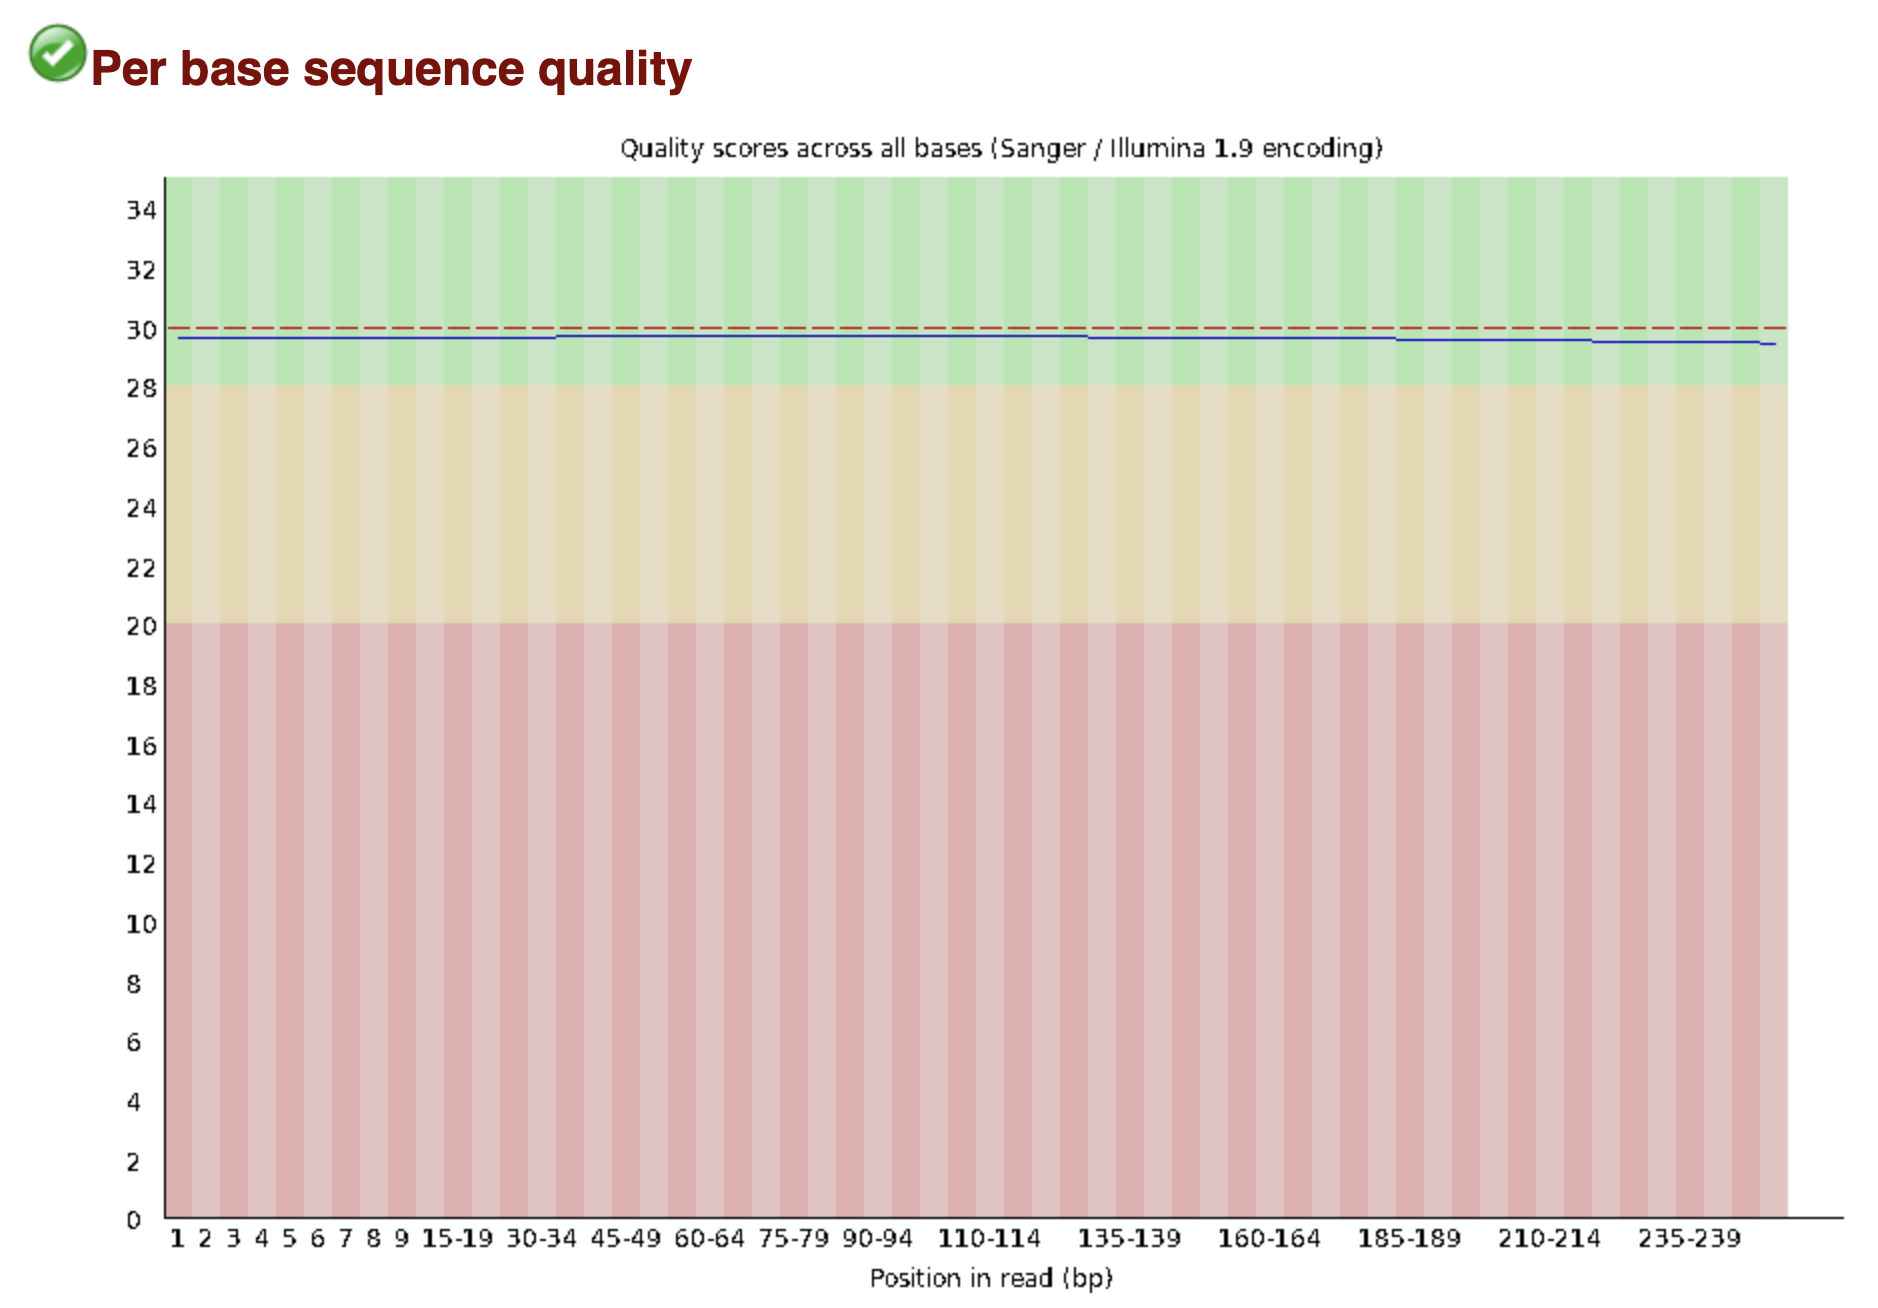

In [ ]:
%%bash
#Trimming reads
trimmomatic SE -threads 4 -phred33 L.plantarum_SRR23493799.fastq trimmed_L.plantarum.fastq SLIDINGWINDOW:4:20 MINLEN:25 
#Checking final quality
fastqc trimmed_L.plantarum.fastq 
#Downloading report (terminal en computador local)
scp mlopezg11@apolo.eafit.edu.co:/home/mlopezg11/slurm_ensamble/trimmed_L.plantarum_SRR23493799_fastqc.html ~/Desktop

### Quality after trimming

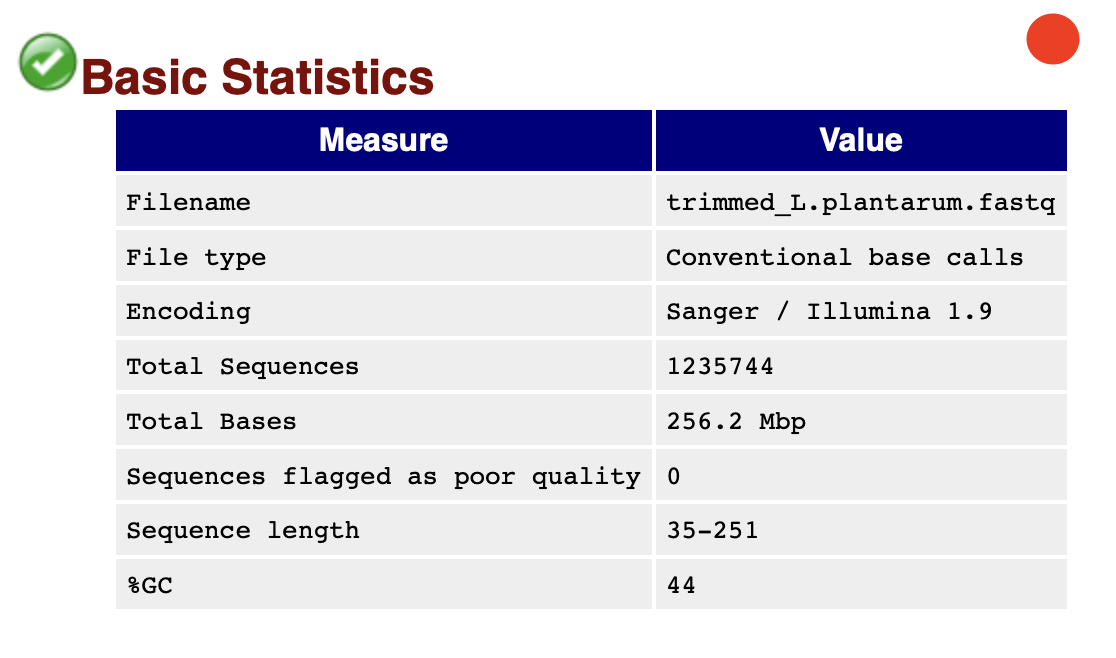

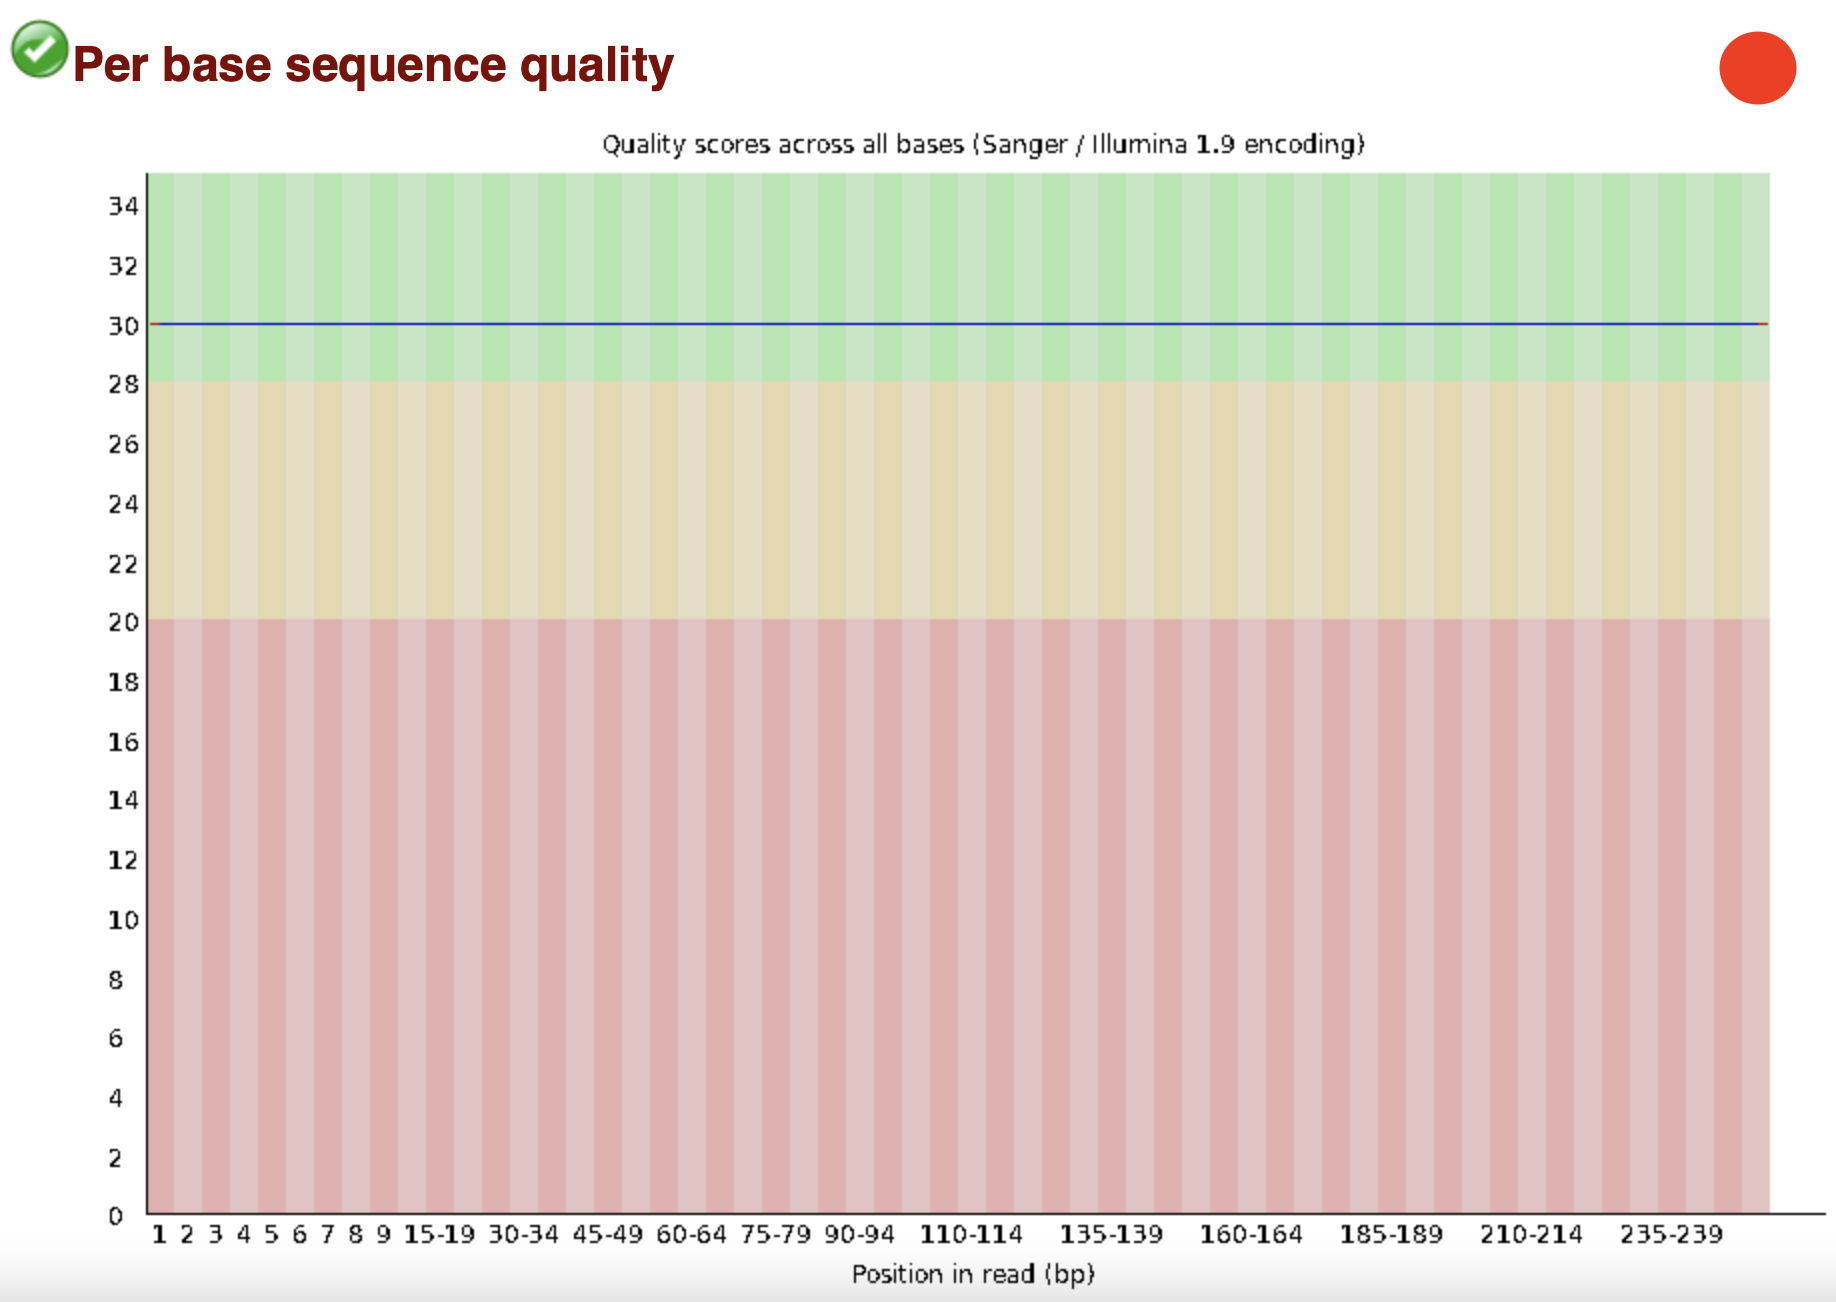

### Assembly


Se realizó el ensamblaje ABySS amssembly en apolo. Para ello se creo un slurm. Se escogieron 3 diferentes valores de Kmers para ver como impactaban la calidad de ensamble:

In [ ]:
%%bash
#ABySS anssembly Kmer= 63
abyss-pe k=63 se=trimmed_L.plantarum.fastq name=lacto_abyss_63 "unitigs"
#Para ver las características del resultado
abyss-fac lacto_abyss_63-unitigs.fa

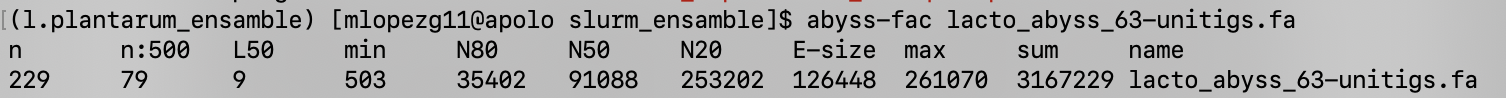

In [ ]:
%%bash
#ABySS anssembly Kmer= 85
abyss-pe k=85 se=trimmed_L.plantarum.fastq name=lacto_abyss_85 "unitigs"
#Para ver las características del resultado
abyss-fac lacto_abyss_85-unitigs.fa

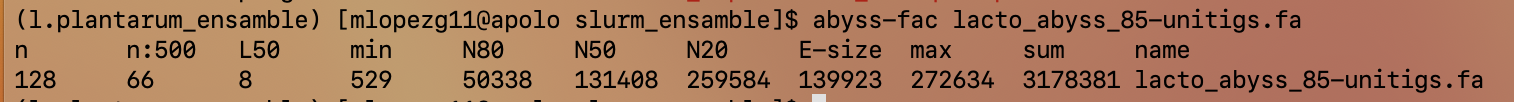

In [ ]:
%%bash
#ABySS anssembly Kmer= 95
abyss-pe k=95 se=trimmed_L.plantarum.fastq name=lacto_abyss_95 "unitigs"
#Para ver las características del resultado
abyss-fac lacto_abyss_95-unitigs.fa

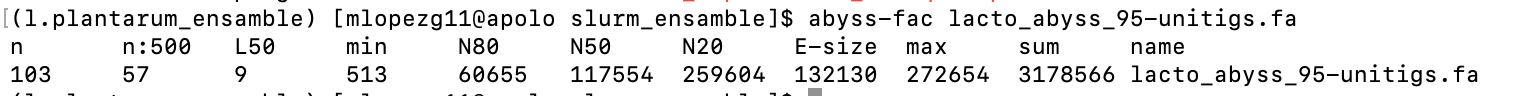

## Conclusión
Para poder considerar los datos es importante primero establecer que es lo que nos indican las estadísticas de los resultados, así como también cuales son los más informativos, en este caso considermos N50 y L50, los cuales se pueden definir como: 

**N50:** Esta estadística define la calidad del ensamblaje en términos de continuidad. N50 se calcula ordenando primero cada unitig, contig o scaffold de mayor a menor longitud. A continuación, empezando por la secuencia más larga, se suman las longitudes de cada secuencia, hasta que esta suma es igual a la mitad de la longitud total de todas las secuencias del ensamblaje. Los valores más altos de N50 indican un mejor ensamblaje. Se debe tener en cuenta que cualquier estadística *`Nx`* se calcula de la misma manera, por ejemplo, N75 se calcula sumando todas las longitudes hasta que la suma sea igual al 75% de la longitud total.

**L50:** Se define como el menor número de contigs cuya suma de longitudes constituye la mitad de la longitud total del ensamblaje.

Ahora bien, al compararlo con los resultados presentados dentro de la NCBI (https://www.ncbi.nlm.nih.gov/assembly/GCA_028462565.1), podemos considerar lo siguiente: 

Screenshot 2023-03-23 at 6.29.15 PM.png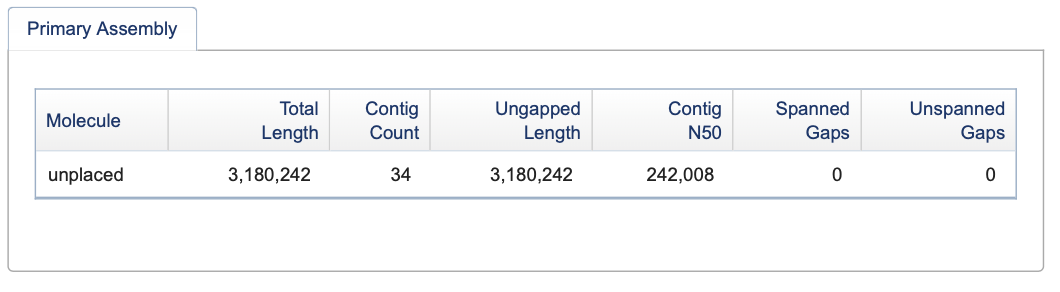


En el caso del valor N50 el valor más aproximado se obtuvo con un valor de `kmer = 85`, donde en el ensamblaje de la NCBI se obtuvo un valor de N50 = 242,008 y en el caso de nuestro ensamble fue de N50 = 131408. 

Por otro lado, al analizar los valores de L50, podemos ver que los valores publicados por la NCBI es de L50 = 5, esta valor también se encuentra más cercano al ensamble de `kmer = 85` donde tuvo un valor L50 = 8.

Es importante mencionar que en este caso puede que los valores no sean los más cercanos debido a que el método empleado dentro de los datos reportados por la NCBI fue SPAdes v. 3.13.2, a diferencia de nuestros análisis realizados con ABySS. 